source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [1]:
%pwd

'/Users/cristinasandoval/Desktop/DATA_practice/Capstone1'

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pwd

/Users/cristinasandoval/Desktop/DATA_practice/Capstone1


In [4]:
!ls ..

Capstone1             after_lunch           jenn-ttp
Capstone1_Data        afternoon_thoughts    jupyter_notebooks
PythonAssessment      git-primer-checkpoint
Untitled-1            group_work


In [5]:
path = 'Capstone1_Data'
filepath1 = os.path.join('..',path,'dataframe.csv') #if file is not in same dir as notebook, must change path
filepath2 = os.path.join('..',path,'dataframe_all_timestamps.csv') #if file is not in same dir as notebook, must change path

df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [6]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [7]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [8]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,9.877554,7.375882,3.178054,5.375278
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,9.940061,6.940222,6.326149,5.497168
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,12.242660,7.255591,5.003946,4.510860
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,9.674074,4.962845,2.397895,2.079442
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,11.518987,7.056175,3.891820,3.583519


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [10]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 20 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [11]:
video_likes = pd.DataFrame(df, columns=['video_id','likes', 'country'])
video_likes.head()

,video_id,likes,country
0,cJon8yBKv3g,1596,FR
1,g12KeCPRB4Q,1032,FR
2,irIZRH3JlIw,1415,FR
3,SnHtzkQZggA,142,FR
4,u6EoWM2KMPE,1159,FR


In [12]:
video_likes = pd.DataFrame(df, columns=['video_id','title','likes', 'country'])
video_likes.sort_values(by=['likes'], ascending=False)

,video_id,title,likes,country
160289,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827,GB
167397,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,5444541,GB
107307,xpVfcZ0ZcFM,Drake - God’s Plan,4737873,GB
105767,kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,3823879,GB
155749,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,3394437,GB
...,...,...,...,...
29401,IEkP79ED-yU,"(인물탐험) 홍준표의 마술, 류여해의 폭풍 눈물 윤창중 TV 칼럼(2017.12.18)",0,KR
29432,QYNg8erak5I,[민영삼 TV] 임종석 휴가내고 도망간 이유! UAE 충격적 방문 목적 밝혀져!,0,KR
29439,IrAuGQnwLK8,"샤이니 종현 비보에, 슬픔에 잠긴 연예계, '우울 오롯이 혼자, 얼마나 외로웠을까'...",0,KR
145792,Rfm0y2RGcUE,Алексей Венедиктов - Будем наблюдать... 12.05.18,0,RU


In [13]:
video_likes = pd.DataFrame(df, columns=['video_id','title','likes', 'country'])
video_likes.sort_values(by=['likes'], ascending=False)
video_likes_desc = video_likes.sort_values(by=['likes'], ascending=False)


In [14]:
video_likes_desc = video_likes.sort_values(by=['likes'], ascending=False)
top_100_videos = video_likes_desc.head(100)
top_100_videos

,video_id,title,likes,country
160289,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827,GB
167397,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,5444541,GB
107307,xpVfcZ0ZcFM,Drake - God’s Plan,4737873,GB
105767,kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,3823879,GB
155749,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,3394437,GB
...,...,...,...,...
38236,leu-cTvMWTA,EXO 엑소 'Universe' MV,833114,GB
146109,32sYGCOYJUM,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,827026,CA
129013,4kDklB6-69Q,Poo Bear ft. Justin Bieber & Jay Electronica -...,825258,US
161047,Ck4xHocysLw,Ozuna - Única (Video Oficial) 🐻 A U R A,824296,GB


In [15]:
top_videos_country = top_100_videos.groupby('country')
top_videos_country.head(20)


,video_id,title,likes,country
160289,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827,GB
167397,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,5444541,GB
107307,xpVfcZ0ZcFM,Drake - God’s Plan,4737873,GB
105767,kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,3823879,GB
155749,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,3394437,GB
32380,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,3312868,GB
18822,kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,2960250,GB
119441,_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,2818771,GB
24460,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,2701353,GB
148516,p8npDG2ulKQ,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2700800,US


In [16]:
video_likes_desc = video_likes.sort_values(by=['likes'], ascending=False)
top_100_videos = video_likes_desc.head(100)
top_100_videos

,video_id,title,likes,country
160289,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827,GB
167397,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,5444541,GB
107307,xpVfcZ0ZcFM,Drake - God’s Plan,4737873,GB
105767,kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,3823879,GB
155749,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,3394437,GB
...,...,...,...,...
38236,leu-cTvMWTA,EXO 엑소 'Universe' MV,833114,GB
146109,32sYGCOYJUM,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,827026,CA
129013,4kDklB6-69Q,Poo Bear ft. Justin Bieber & Jay Electronica -...,825258,US
161047,Ck4xHocysLw,Ozuna - Única (Video Oficial) 🐻 A U R A,824296,GB


In [17]:
top_video_likes = pd.DataFrame(top_100_videos, columns=['country'])

In [18]:
category = df['category']
category.head()

0    Film & Animation
1              Gaming
2     News & Politics
3    Film & Animation
4              Comedy
Name: category, dtype: object

In [19]:
category.loc[1:100]

1                    Gaming
2           News & Politics
3          Film & Animation
4                    Comedy
5                    Sports
               ...         
96            Entertainment
97                   Comedy
98                   Sports
99                   Comedy
100    Science & Technology
Name: category, Length: 100, dtype: object

In [20]:
cat_counts = category.value_counts()
print(cat_counts)

Entertainment            50468
People & Blogs           28045
News & Politics          20327
Sports                   12561
Comedy                   10358
Music                    10145
Howto & Style             9580
Film & Animation          8460
Gaming                    5318
Education                 3897
Science & Technology      3404
Autos & Vehicles          3274
Pets & Animals            2271
Nonprofits & Activism     1779
Travel & Events            812
Shows                      435
Movies                      12
Trailers                     3
Name: category, dtype: int64


Text(0, 0.5, 'Number of videos')

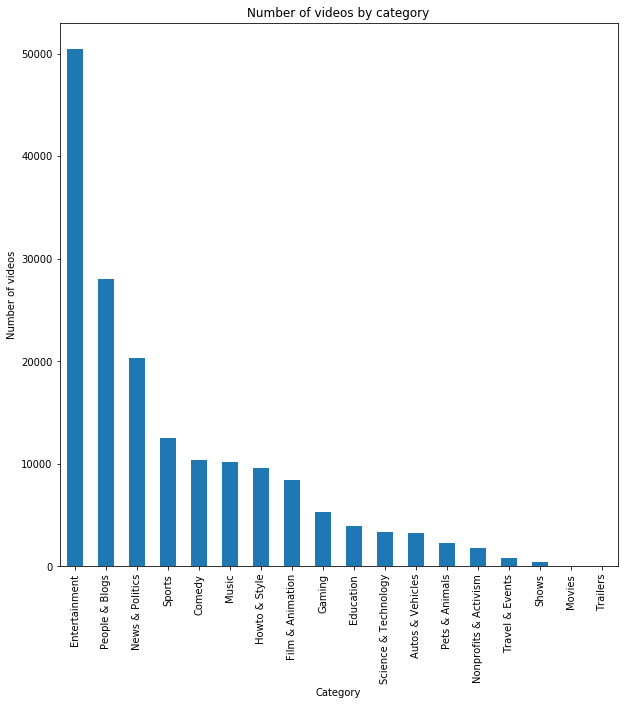

In [21]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
cat_counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of videos by category') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

In [ ]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
df.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of likes by category') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Number of likes')# Set text for y axis

In [ ]:
country = df['country']
country.head()

In [ ]:
country_count = df['country'].value_counts() 
country_count

In [ ]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
country_count.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of videos by country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20)) # define plot area
ax = fig.gca() # define axis                   
df.plot(kind = 'scatter', x = 'views', y = 'likes', ax = ax)
ax.set_title('Scatter plot of views vs likes') # Give the plot a main title
ax.set_xlabel('Views') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20)) # define plot area
ax = fig.gca() # define axis                   
df.plot(kind = 'scatter', x = 'category_id', y = 'likes', ax = ax)
ax.set_title('Scatter plot of views vs likes') # Give the plot a main title
ax.set_xlabel('Views') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis